# XGBClassifier

In [1]:
import some_load_train_evaluate_functions as ml

from xgboost import XGBClassifier

In [2]:
path = '../KG/db.env'

driver = ml.connect_to_neo4j(path)

Connected to database successfully.


### Load Data

In [3]:
# Diabetes data

diabetes_df = ml.get_data_of_disease(driver, 'Diabetes')
diabetes_df

,Respondent_ID,Gender,Age,BMI,25-hydroxyvitamin D2 + D3 [nmol/L],A/G Ratio,Alpha-carotene [umol/L],Alpha-crypotoxanthin [umol/L],Alpha-tocopherol [umol/L],Basophils [%],...,Ferritin [ng/mL],Gamma Glutamyl Transferase [IU/L],Hemoglobin [g/dL],Insulin [pmol/L],LDL-Cholesterol(NIH2) [mmol/L],Lactate Dehydrogenase [IU/L],Transferrin Saturation [%],Transferrin receptor [nmol/L],Triglyceride [mmol/L],Diabetes
0,93703,0,2,17.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,93704,1,2,15.7,74.4,NaN,NaN,NaN,NaN,0.7,...,36.60,NaN,13.1,NaN,NaN,NaN,NaN,30.6,NaN,0
2,93705,0,66,31.7,89.9,1.517241,0.138,0.071,26.006,1.0,...,28.70,21.0,11.9,NaN,NaN,174.0,28.0,39.8,NaN,0
3,93706,1,18,21.5,53.8,1.629630,0.160,0.031,16.765,0.8,...,284.00,16.0,16.3,NaN,NaN,142.0,51.0,34.0,NaN,0
4,93707,1,13,18.1,58.2,1.857143,0.009,0.044,22.756,0.5,...,49.30,9.0,14.5,NaN,NaN,177.0,21.0,34.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8888,102952,0,70,20.0,82.7,1.846154,0.235,0.077,31.347,0.6,...,135.00,18.0,13.4,26.34,1.112,168.0,39.0,29.1,0.881,1
8889,102953,1,42,35.8,49.5,1.142857,0.106,0.080,21.873,0.6,...,120.00,28.0,15.5,NaN,NaN,136.0,20.0,28.6,NaN,0
8890,102954,0,41,26.1,50.5,1.500000,0.117,0.056,26.935,1.4,...,1.99,8.0,6.4,56.94,2.793,123.0,5.0,248.0,0.553,0
8891,102955,0,14,45.6,61.9,1.205882,0.031,0.079,17.856,0.9,...,11.40,16.0,11.4,NaN,NaN,158.0,5.0,57.7,NaN,0


In [4]:
xg_boost = XGBClassifier()

## Preprocessing

### No Imputation

In [9]:
# XGBoost handles null values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                        impute = False, scale=True,
                                                        imputer=ml.SimpleImputer(strategy='constant',fill_value=0),
                                                        random_state=42)


Train Accuracy: 0.993

Test Accuracy: 0.993

Precision: 0.994

Recall: 0.957

F1-Score: 0.975

Confusion Matrix:

[[3070    3]
 [  21  463]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00      3073
     Class 1       0.99      0.96      0.97       484

    accuracy                           0.99      3557
   macro avg       0.99      0.98      0.99      3557
weighted avg       0.99      0.99      0.99      3557


ROC-AUC Curve:


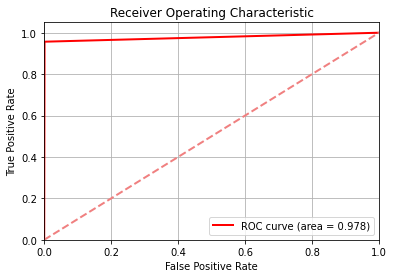

In [10]:
xg_boost.fit(X_train.values, y_train.values)

ml.evaluate_model_metrics(xg_boost,X_train,y_train,X_val,y_val)

### Zero Imputation

In [5]:
# Imputing null values with zeroes

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                        impute = True, scale=True,
                                                        imputer=ml.SimpleImputer(strategy='constant',fill_value=0),
                                                        random_state=42)


Train Accuracy: 0.993

Test Accuracy: 0.993

Precision: 0.996

Recall: 0.955

F1-Score: 0.975

Confusion Matrix:

[[3071    2]
 [  22  462]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00      3073
     Class 1       1.00      0.95      0.97       484

    accuracy                           0.99      3557
   macro avg       0.99      0.98      0.99      3557
weighted avg       0.99      0.99      0.99      3557


ROC-AUC Curve:


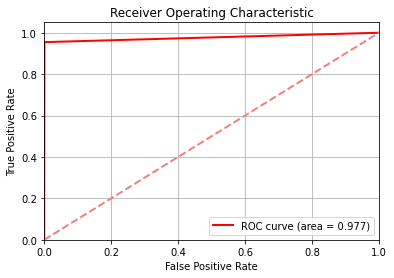

In [7]:
xg_boost.fit(X_train.values, y_train.values)

ml.evaluate_model_metrics(xg_boost,X_train,y_train,X_val,y_val)

### Mode Imputation

In [14]:
# Imputing with most frequent values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='most_frequent'),
                                                              random_state=42)


Train Accuracy: 0.992

Test Accuracy: 0.993

Precision: 0.994

Recall: 0.952

F1-Score: 0.973

Confusion Matrix:

[[3070    3]
 [  23  461]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00      3073
     Class 1       0.99      0.95      0.97       484

    accuracy                           0.99      3557
   macro avg       0.99      0.98      0.98      3557
weighted avg       0.99      0.99      0.99      3557


ROC-AUC Curve:


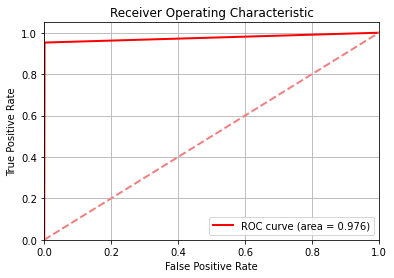

In [15]:
xg_boost.fit(X_train.values, y_train.values)

ml.evaluate_model_metrics(xg_boost,X_train,y_train,X_val,y_val)

### Multiple Imputation by Chained Equations (MICE)

In [16]:
# Imputes by looking at data from other columns and trying to estimate the best prediction for each missing value.

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.IterativeImputer(max_iter=20),
                                                              random_state=42)


Train Accuracy: 0.995

Test Accuracy: 0.995

Precision: 0.994

Recall: 0.969

F1-Score: 0.981

Confusion Matrix:

[[3070    3]
 [  15  469]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3073
     Class 1       0.99      0.97      0.98       484

    accuracy                           0.99      3557
   macro avg       0.99      0.98      0.99      3557
weighted avg       0.99      0.99      0.99      3557


ROC-AUC Curve:


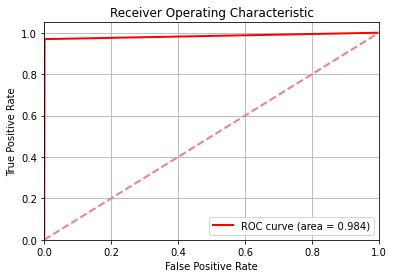

In [17]:
xg_boost.fit(X_train.values, y_train.values)

ml.evaluate_model_metrics(xg_boost,X_train,y_train,X_val,y_val)

### Median Imputation

In [18]:
# Imputing with median values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='median'),
                                                              random_state=42)


Train Accuracy: 0.992

Test Accuracy: 0.992

Precision: 0.996

Recall: 0.948

F1-Score: 0.971

Confusion Matrix:

[[3071    2]
 [  25  459]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00      3073
     Class 1       1.00      0.95      0.97       484

    accuracy                           0.99      3557
   macro avg       0.99      0.97      0.98      3557
weighted avg       0.99      0.99      0.99      3557


ROC-AUC Curve:


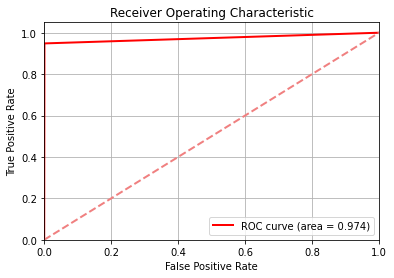

In [19]:
xg_boost.fit(X_train.values, y_train.values)

ml.evaluate_model_metrics(xg_boost,X_train,y_train,X_val,y_val)

### Mean Imputation

In [20]:
# Splitting and Preprocessing data

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)


Train Accuracy: 0.992

Test Accuracy: 0.992

Precision: 0.989

Recall: 0.952

F1-Score: 0.971

Confusion Matrix:

[[3068    5]
 [  23  461]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00      3073
     Class 1       0.99      0.95      0.97       484

    accuracy                           0.99      3557
   macro avg       0.99      0.98      0.98      3557
weighted avg       0.99      0.99      0.99      3557


ROC-AUC Curve:


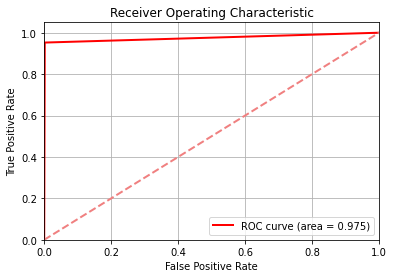

In [21]:
xg_boost.fit(X_train.values, y_train.values)

ml.evaluate_model_metrics(xg_boost,X_train,y_train,X_val,y_val)

### k-NN Imputation

In [5]:
# Imputing missing values with values from the k-nearest neighbors in the feature space

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.KNNImputer(n_neighbors=20),
                                                              random_state=42)


Train Accuracy: 0.995

Test Accuracy: 0.996

Precision: 0.994

Recall: 0.973

F1-Score: 0.983

Confusion Matrix:

[[3070    3]
 [  13  471]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3073
     Class 1       0.99      0.97      0.98       484

    accuracy                           1.00      3557
   macro avg       0.99      0.99      0.99      3557
weighted avg       1.00      1.00      1.00      3557


ROC-AUC Curve:


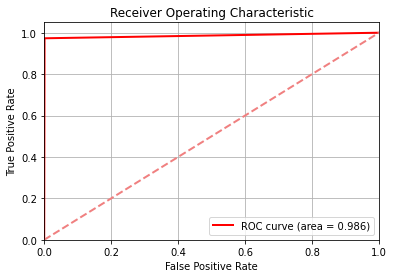

In [6]:
xg_boost.fit(X_train.values, y_train.values)

ml.evaluate_model_metrics(xg_boost,X_train,y_train,X_val,y_val)

## Oversampling and Undersampling

### Random Oversampling


Train Accuracy: 0.995

Test Accuracy: 0.990

Precision: 0.929

Recall: 1.000

F1-Score: 0.963

Confusion Matrix:

[[3036   37]
 [   0  484]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      0.99      0.99      3073
     Class 1       0.93      1.00      0.96       484

    accuracy                           0.99      3557
   macro avg       0.96      0.99      0.98      3557
weighted avg       0.99      0.99      0.99      3557


ROC-AUC Curve:


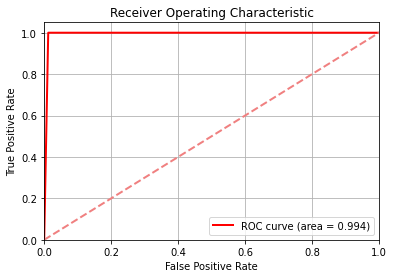

In [27]:
X_ros, y_ros = ml.random_over_sample(X_train, y_train)

xg_boost.fit(X_ros.values, y_ros.values)

ml.evaluate_model_metrics(xg_boost,X_ros, y_ros,X_val, y_val)

### SMOTE (Synthetic Minority Over-sampling Technique)


Train Accuracy: 0.996

Test Accuracy: 0.991

Precision: 0.941

Recall: 0.996

F1-Score: 0.968

Confusion Matrix:

[[3043   30]
 [   2  482]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      0.99      0.99      3073
     Class 1       0.94      1.00      0.97       484

    accuracy                           0.99      3557
   macro avg       0.97      0.99      0.98      3557
weighted avg       0.99      0.99      0.99      3557


ROC-AUC Curve:


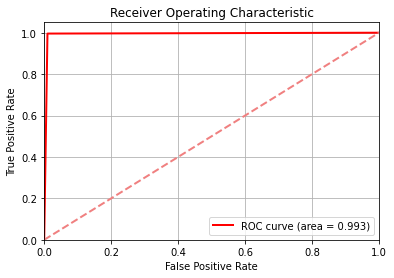

In [28]:
X_smote, y_smote = ml.smote_over_sample(X_train, y_train)

xg_boost.fit(X_smote.values, y_smote.values)

ml.evaluate_model_metrics(xg_boost,X_smote, y_smote,X_val, y_val)

### Random Undersampling


Train Accuracy: 0.995

Test Accuracy: 0.901

Precision: 0.579

Recall: 0.996

F1-Score: 0.732

Confusion Matrix:

[[2722  351]
 [   2  482]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      0.89      0.94      3073
     Class 1       0.58      1.00      0.73       484

    accuracy                           0.90      3557
   macro avg       0.79      0.94      0.84      3557
weighted avg       0.94      0.90      0.91      3557


ROC-AUC Curve:


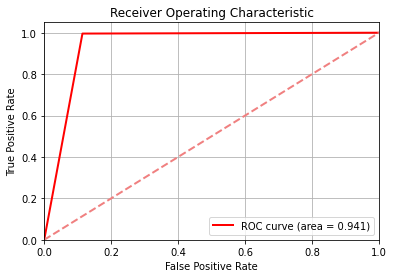

In [29]:
X_rus, y_rus = ml.random_under_sample(X_train, y_train)

xg_boost.fit(X_rus.values, y_rus.values)

ml.evaluate_model_metrics(xg_boost,X_rus, y_rus,X_val, y_val)

### Tomek Links


Train Accuracy: 0.995

Test Accuracy: 0.994

Precision: 0.981

Recall: 0.975

F1-Score: 0.978

Confusion Matrix:

[[3064    9]
 [  12  472]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3073
     Class 1       0.98      0.98      0.98       484

    accuracy                           0.99      3557
   macro avg       0.99      0.99      0.99      3557
weighted avg       0.99      0.99      0.99      3557


ROC-AUC Curve:


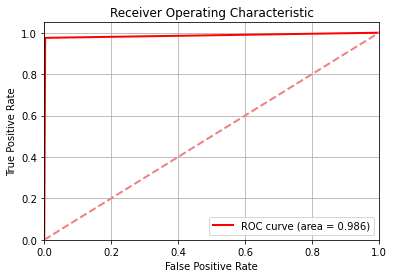

In [7]:
X_tomek, y_tomek = ml.tomek_links(X_train, y_train)

xg_boost.fit(X_tomek.values, y_tomek.values)

ml.evaluate_model_metrics(xg_boost,X_tomek, y_tomek,X_val, y_val)

### SMOTE + Tomek Links


Train Accuracy: 0.995

Test Accuracy: 0.991

Precision: 0.940

Recall: 0.996

F1-Score: 0.967

Confusion Matrix:

[[3042   31]
 [   2  482]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      0.99      0.99      3073
     Class 1       0.94      1.00      0.97       484

    accuracy                           0.99      3557
   macro avg       0.97      0.99      0.98      3557
weighted avg       0.99      0.99      0.99      3557


ROC-AUC Curve:


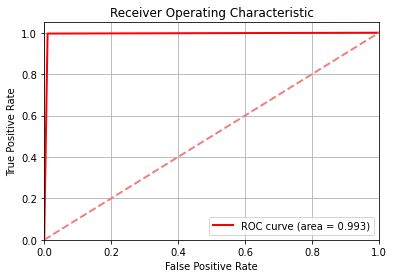

In [31]:
X_smote_tomek, y_smote_tomek = ml.smote_tomek(X_train, y_train)

xg_boost.fit(X_smote_tomek.values, y_smote_tomek.values)

ml.evaluate_model_metrics(xg_boost,X_smote_tomek, y_smote_tomek,X_val, y_val)

In [8]:
# Random Undersampling provides best results

X_train, y_train = X_tomek, y_tomek

## Feature Selection

### Correlation Analysis

In [9]:
xg_boost_test = XGBClassifier()

In [10]:
pos_corr, neg_corr = ml.get_correlated_features(diabetes_df,'Diabetes',pos=0.1,neg=-0.1)

corr_features = ['Gender'] + list(pos_corr.keys()[1:10]) + list(neg_corr.keys()[:10]) 


Train Accuracy: 0.995

Test Accuracy: 0.994

Precision: 0.983

Recall: 0.971

F1-Score: 0.977

Confusion Matrix:

[[3065    8]
 [  14  470]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3073
     Class 1       0.98      0.97      0.98       484

    accuracy                           0.99      3557
   macro avg       0.99      0.98      0.99      3557
weighted avg       0.99      0.99      0.99      3557


ROC-AUC Curve:


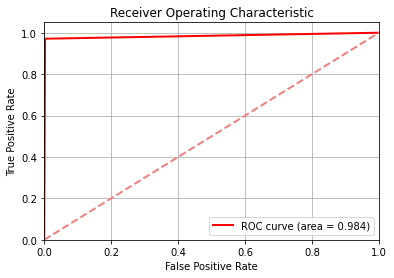

In [12]:
ml.evaluate_feature_set(corr_features, xg_boost_test, X_train, y_train, X_val, y_val, val=True)

### SelectFromModel

In [20]:
sfm_features = ml.select_from_model_features(ml.RandomForestClassifier(),X,y)
sfm_features

['Age',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Chromium [nmol/L]',
 'Creatinine [mg/dL]',
 'Fasting Glucose [mmol/L]',
 'Glycohemoglobin [%]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Osmolality [mmol/Kg]',
 'Retinol [umol/L]',
 'Total Cholesterol [mmol/L]',
 'Insulin [pmol/L]',
 'LDL-Cholesterol(NIH2) [mmol/L]']


Train Accuracy: 0.994

Test Accuracy: 0.993

Precision: 0.979

Recall: 0.969

F1-Score: 0.974

Confusion Matrix:

[[3063   10]
 [  15  469]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3073
     Class 1       0.98      0.97      0.97       484

    accuracy                           0.99      3557
   macro avg       0.99      0.98      0.98      3557
weighted avg       0.99      0.99      0.99      3557


ROC-AUC Curve:


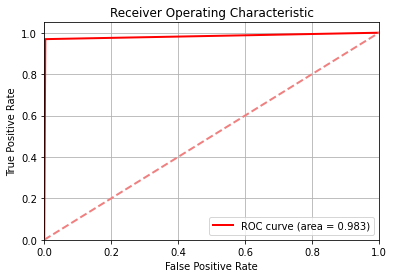

In [21]:
sfm_features = list(sfm_features)

ml.evaluate_feature_set(sfm_features, xg_boost_test, X_train, y_train, X_val, y_val, val=True)

### SelectKBest

In [15]:
k_best_features = ml.select_k_best(X, y, n=30)
k_best_features[:30]

array(['Glycohemoglobin [%]', 'Fasting Glucose [mmol/L]', 'Age', 'BMI',
       'Blood Urea Nitrogen [mg/dL]', 'Retinol [umol/L]',
       'Osmolality [mmol/Kg]', 'Alpha-tocopherol [umol/L]',
       'Lymphocyte [%]', 'Phosphorus [mg/dL]',
       'Lymphocyte_C-Reactive Protein Ratio', 'Albumin [g/dL]',
       'Creatinine [mg/dL]', 'Alpha-crypotoxanthin [umol/L]',
       'Insulin [pmol/L]', 'Segmented neutrophils [%]',
       'Triglyceride [mmol/L]', 'Neutrophil_Lymphocyte Ratio',
       'Ferritin [ng/mL]', 'Alkaline Phosphatase [IU/L]',
       'Uric Acid [mg/dL]', 'Triglyceride_HDL Ratio', 'A/G Ratio',
       'Platelet_WBC Ratio', 'C-Reactive Protein [mg/L]',
       'Direct HDL-Cholesterol [mmol/L]',
       'Platelet count [1000 cells/uL]', 'Total Cholestrol_HDL Ratio',
       'Chloride [mmol/L]', 'Mean cell volume [fL]'], dtype=object)


Train Accuracy: 0.995

Test Accuracy: 0.994

Precision: 0.983

Recall: 0.973

F1-Score: 0.978

Confusion Matrix:

[[3065    8]
 [  13  471]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3073
     Class 1       0.98      0.97      0.98       484

    accuracy                           0.99      3557
   macro avg       0.99      0.99      0.99      3557
weighted avg       0.99      0.99      0.99      3557


ROC-AUC Curve:


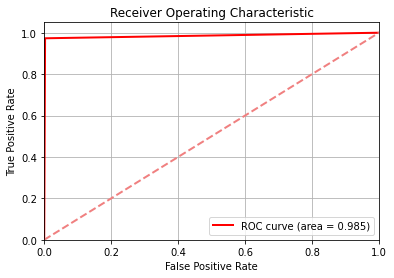

In [17]:
k_best_features_ = list(k_best_features[:30]) + ['Gender']

ml.evaluate_feature_set(k_best_features_, xg_boost_test, X_train, y_train, X_val, y_val, val=True)

### Recursive Feature Elimination (RFE) 

In [22]:
rfe_features = ml.select_rfe_features(ml.XGBClassifier(),X,y,n=0.3,step=0.5)
rfe_features[:30]

array(['Triglyceride [mmol/L]', 'Lymphocyte_C-Reactive Protein Ratio',
       'Total Cholesterol [mmol/L]', 'Hydroxycotinine [ng/mL]',
       'Alanine Aminotransferase [U/L]', 'Glycohemoglobin [%]',
       'Bicarbonate [mmol/L]', 'Fasting Glucose [mmol/L]',
       'Mean cell volume [fL]', 'Neutrophil_Lymphocyte Ratio',
       'Non_HDL Ratio', 'Osmolality [mmol/Kg]', 'LDL_HDL Ratio',
       'Blood mercury [nmol/L]', 'Transferrin receptor [nmol/L]',
       'Hemoglobin [g/dL]', 'Age', 'BMI', 'Total Cholestrol_HDL Ratio',
       'Retinyl stearate [umol/L]', 'Trans-lycopene [umol/L]',
       'Lactate Dehydrogenase [IU/L]', 'Retinol [umol/L]',
       'Total Lycopene [umol/L]', 'Blood Urea Nitrogen [mg/dL]',
       'Lymphocyte [%]', 'White blood cell count [1000 cells/uL]',
       'Retinyl palmitate [umol/L]', 'RBC count [million cells/uL]',
       'UIBC [umol/L]'], dtype=object)


Train Accuracy: 0.995

Test Accuracy: 0.993

Precision: 0.977

Recall: 0.973

F1-Score: 0.975

Confusion Matrix:

[[3062   11]
 [  13  471]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3073
     Class 1       0.98      0.97      0.98       484

    accuracy                           0.99      3557
   macro avg       0.99      0.98      0.99      3557
weighted avg       0.99      0.99      0.99      3557


ROC-AUC Curve:


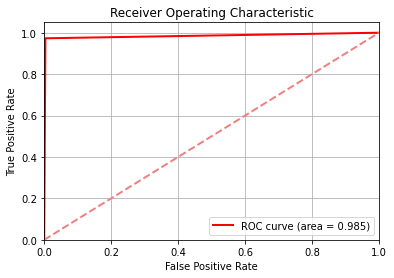

In [24]:
rfe_features_ = list(rfe_features[:30])

ml.evaluate_feature_set(rfe_features_, xg_boost_test, X_train, y_train, X_val, y_val, val=True)

### Lasso Regularization

In [25]:
l1_selected_features = ml.log_reg_lasso_select(X_train, y_train)
l1_selected_features[:30]

['Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Age',
 'Gender',
 'Alkaline Phosphatase [IU/L]',
 'Osmolality [mmol/Kg]',
 'BMI',
 'Retinol [umol/L]',
 'Total Cholesterol [mmol/L]',
 'White blood cell count [1000 cells/uL]',
 'Insulin [pmol/L]',
 'Non_HDL Ratio',
 'Vitamin C [umol/L]',
 'Gamma Glutamyl Transferase [IU/L]',
 'Transferrin Saturation [%]',
 'Transferrin receptor [nmol/L]',
 'Blood lead [umol/L]',
 'Ferritin [ng/mL]',
 'Creatine Phosphokinase [IU/L]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Sodium [mmol/L]',
 'Aspartate Aminotransferase [U/L]',
 'Creatinine [mg/dL]',
 'Platelet count [1000 cells/uL]',
 'Direct HDL-Cholesterol [mmol/L]',
 'Chloride [mmol/L]',
 'Platelet_Lymphocyte Ratio',
 'Lactate Dehydrogenase [IU/L]',
 'Cotinine [ng/mL]',
 'Alpha-crypotoxanthin [umol/L]']


Train Accuracy: 0.995

Test Accuracy: 0.994

Precision: 0.985

Recall: 0.973

F1-Score: 0.979

Confusion Matrix:

[[3066    7]
 [  13  471]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3073
     Class 1       0.99      0.97      0.98       484

    accuracy                           0.99      3557
   macro avg       0.99      0.99      0.99      3557
weighted avg       0.99      0.99      0.99      3557


ROC-AUC Curve:


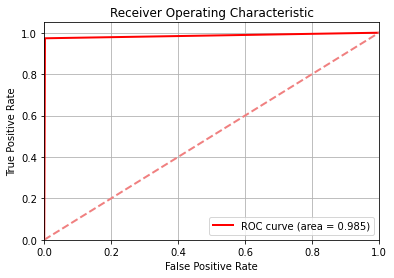

In [27]:
l1_selected_features_ = list(l1_selected_features[:30]) 

ml.evaluate_feature_set(l1_selected_features_, xg_boost_test, X_train, y_train, X_val, y_val, val=True)

### Relief F

In [28]:
relieff_features = ml.relief_feature_select(30,X,y)

In [29]:
relieff_features_ = relieff_features[:30]
relieff_features_

['Age',
 'Glycohemoglobin [%]',
 'BMI',
 'Retinol [umol/L]',
 'Fasting Glucose [mmol/L]',
 'Alpha-tocopherol [umol/L]',
 'Phosphorus [mg/dL]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Blood Urea Nitrogen [mg/dL]',
 'Segmented neutrophils [%]',
 'Lymphocyte [%]',
 'Non_HDL Ratio',
 'Mean cell volume [fL]',
 'Uric Acid [mg/dL]',
 'Total Cholesterol [mmol/L]',
 'Albumin [g/dL]',
 'Hematocrit [%]',
 'Total Iron Binding Capacity [umol/L]',
 'LDL_HDL Ratio',
 'Alkaline Phosphatase [IU/L]',
 'Osmolality [mmol/Kg]',
 'A/G Ratio',
 'Total Calcium [mg/dL]',
 'Hemoglobin [g/dL]',
 'Alpha-crypotoxanthin [umol/L]',
 'Lactate Dehydrogenase [IU/L]',
 'Platelet count [1000 cells/uL]',
 'Mean cell hemoglobin [pg]',
 'Total Cholestrol_HDL Ratio',
 'UIBC [umol/L]']


Train Accuracy: 0.995

Test Accuracy: 0.994

Precision: 0.985

Recall: 0.969

F1-Score: 0.977

Confusion Matrix:

[[3066    7]
 [  15  469]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3073
     Class 1       0.99      0.97      0.98       484

    accuracy                           0.99      3557
   macro avg       0.99      0.98      0.99      3557
weighted avg       0.99      0.99      0.99      3557


ROC-AUC Curve:


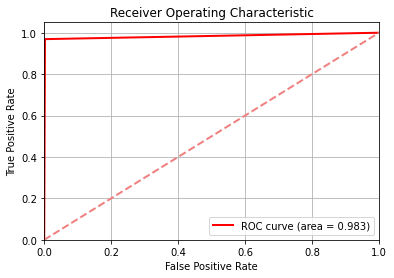

In [30]:
relieff_features_list = list(relieff_features_)

ml.evaluate_feature_set(relieff_features_list, xg_boost_test, X_train, y_train, X_val, y_val, val=True)

### XGBoost Feature Importances

In [10]:
def get_xgb_features(model, X_train):
    
    xgb_features = ml.pd.DataFrame(model.feature_importances_, index=X_train.columns,
                                             columns=['Importance'])
    xgb_features = xgb_features.sort_values('Importance', ascending=False)
    xgb_features = list(xgb_features.index)
    
    return xgb_features

In [11]:
xgb_features = get_xgb_features(xg_boost, X_train)
xgb_features[:30]

['Glycohemoglobin [%]',
 'Age',
 'Fasting Glucose [mmol/L]',
 'Triglyceride [mmol/L]',
 'Lymphocyte [%]',
 'Total Cholesterol [mmol/L]',
 'Transferrin Saturation [%]',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Trans-lycopene [umol/L]',
 'Total Lycopene [umol/L]',
 'Iron [ug/dL]',
 'Lymphocyte_Monocyte Ratio',
 'Cotinine [ng/mL]',
 'Basophils [%]',
 'Chromium [nmol/L]',
 'White blood cell count [1000 cells/uL]',
 'RBC count [million cells/uL]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Blood manganese [nmol/L]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Beta-cryptoxanthin [umol/L]',
 'Retinyl stearate [umol/L]',
 'Iron frozen [umol/L]',
 'Total Protein [g/dL]',
 'Creatinine [mg/dL]',
 'Retinol [umol/L]',
 'Alkaline Phosphatase [IU/L]',
 'Retinyl palmitate [umol/L]',
 'LDL-Cholesterol(NIH2) [mmol/L]']


Train Accuracy: 0.995

Test Accuracy: 0.994

Precision: 0.983

Recall: 0.973

F1-Score: 0.978

Confusion Matrix:

[[3065    8]
 [  13  471]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3073
     Class 1       0.98      0.97      0.98       484

    accuracy                           0.99      3557
   macro avg       0.99      0.99      0.99      3557
weighted avg       0.99      0.99      0.99      3557


ROC-AUC Curve:


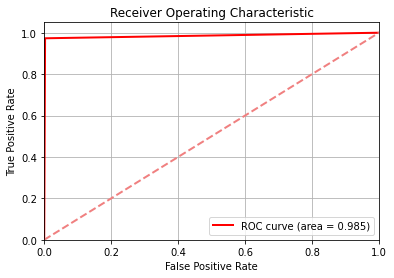

In [12]:
ml.evaluate_feature_set(xgb_features, xg_boost_test, X_train, y_train, X_val, y_val, val=True)

### Ensemble of Feature Sets

In [35]:
# We can also create a feature set from the above sets by selecting commonly occuring features

list1 = list(corr_features)
list2 = list(k_best_features)
list3 = list(sfm_features)
list4 = list(rfe_features)
list5 = list(l1_selected_features)
list6 = list(relieff_features)
list7 = list(xgb_features)

combined_list = list1 + list2 + list3 + list4 + list5 + list6 + list7
feature_counts = ml.Counter(combined_list)
min_count = 6

combined_features = [feature for feature, count in feature_counts.items() if count >= min_count]
# combined_features = [x for x in relieff_features if x in combined_features]     # order based on releif features
combined_features

['Gender',
 'Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Age',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Insulin [pmol/L]',
 'Osmolality [mmol/Kg]',
 'Retinol [umol/L]',
 'Triglyceride [mmol/L]',
 'Total Lycopene [umol/L]',
 'Trans-lycopene [umol/L]',
 'Platelet count [1000 cells/uL]',
 'A/G Ratio',
 'Chloride [mmol/L]',
 'Platelet_WBC Ratio',
 'Direct HDL-Cholesterol [mmol/L]',
 'Albumin [g/dL]',
 'Alpha-crypotoxanthin [umol/L]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Creatinine [mg/dL]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Chromium [nmol/L]',
 'Total Cholesterol [mmol/L]']


Train Accuracy: 0.995

Test Accuracy: 0.994

Precision: 0.985

Recall: 0.971

F1-Score: 0.978

Confusion Matrix:

[[3066    7]
 [  14  470]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3073
     Class 1       0.99      0.97      0.98       484

    accuracy                           0.99      3557
   macro avg       0.99      0.98      0.99      3557
weighted avg       0.99      0.99      0.99      3557


ROC-AUC Curve:


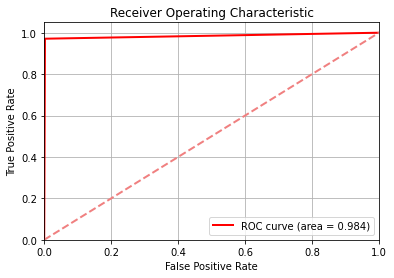

In [36]:
ml.evaluate_feature_set(combined_features, xg_boost_test, X_train, y_train, X_val, y_val, val=True)


Maximum accuracy = 0.9352 for 84 features


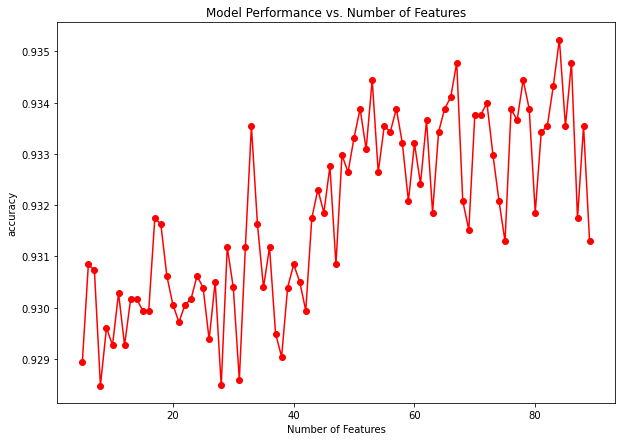

In [15]:
# Optimal no. of features

final_features = list(xgb_features) 

ml.plot_num_feature_performance(xg_boost_test,  X, y, final_features, scoring='accuracy', val=True)


Maximum f1 = 0.7197 for 78 features


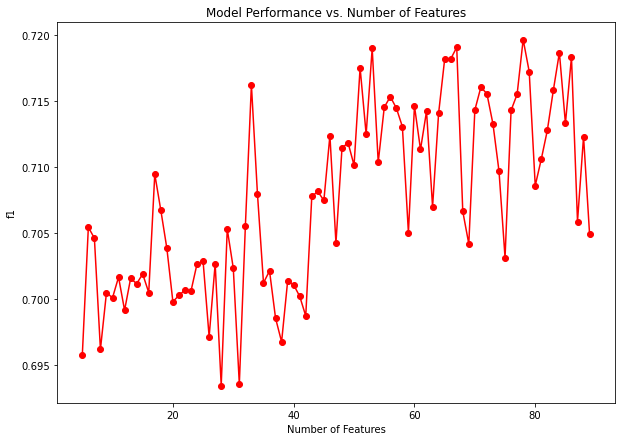

In [17]:
# Optimal no. of features

final_features = list(xgb_features) 

ml.plot_num_feature_performance(xg_boost_test,  X, y, final_features, scoring='f1', val=True)


Train Accuracy: 0.995

Test Accuracy: 0.994

Precision: 0.989

Recall: 0.968

F1-Score: 0.979

Confusion Matrix:

[[3081    5]
 [  15  456]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3086
     Class 1       0.99      0.97      0.98       471

    accuracy                           0.99      3557
   macro avg       0.99      0.98      0.99      3557
weighted avg       0.99      0.99      0.99      3557


ROC-AUC Curve:


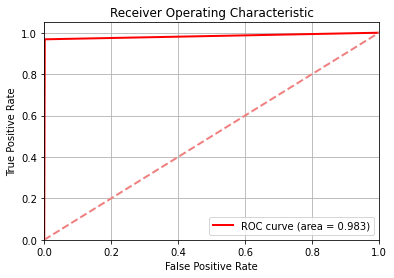

In [21]:
selected = xgb_features[:84]

X = X[selected]
X_train = X_train[selected]
X_test = X_test[selected]

xg_boost.fit(X_train.values, y_train.values)

ml.evaluate_model_metrics(xg_boost, X_train, y_train, X_test, y_test)

## Hyperparameter Optimization 

In [14]:
param_grid = {
    
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [1, 1.5, 2, 3],
    
}

### Random Search

In [22]:
rand_best_params, xg_boost_rand = ml.random_search_optimize(xg_boost,param_grid,n_iter=100,cv=5,
                                                               X_train=X_train, y_train=y_train,
                                                               scoring='accuracy', val=True)

In [23]:
rand_best_params

{'subsample': 1.0,
 'reg_lambda': 2,
 'reg_alpha': 0,
 'learning_rate': 0.2,
 'gamma': 0}


Train Accuracy: 0.995

Test Accuracy: 0.994

Precision: 0.989

Recall: 0.968

F1-Score: 0.979

Confusion Matrix:

[[3081    5]
 [  15  456]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3086
     Class 1       0.99      0.97      0.98       471

    accuracy                           0.99      3557
   macro avg       0.99      0.98      0.99      3557
weighted avg       0.99      0.99      0.99      3557


ROC-AUC Curve:


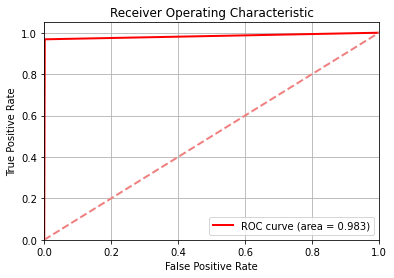

In [25]:
ml.evaluate_model_metrics(xg_boost_rand,X_train,y_train,X_test,y_test)

### Optuna

In [34]:
def objective(trial):

    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_loguniform('eta', 1e-8, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),
    }

    if params['booster'] == 'gbtree' or params['booster'] == 'dart':
        params['subsample'] = trial.suggest_uniform('subsample', 0.1, 1.0)
        params['colsample_bytree'] = trial.suggest_uniform('colsample_bytree', 0.1, 1.0)

    model = XGBClassifier(**params)
    
    model.fit(X_train.values, y_train.values)
    y_pred = model.predict(X_test.values)

    accuracy = ml.accuracy_score(y_test.values, y_pred)

    return accuracy

In [35]:
best_trial , xg_boost_opt = ml.optuna_optimize(objective, XGBClassifier, n_trials=150)

In [36]:
best_trial

{'booster': 'dart',
 'lambda': 5.509309595225655e-06,
 'alpha': 1.987203857561228e-08,
 'max_depth': 10,
 'eta': 0.5969933171836876,
 'gamma': 0.3570943370279572,
 'grow_policy': 'depthwise',
 'subsample': 0.9683278296394089,
 'colsample_bytree': 0.9246376376689649}


Train Accuracy: 0.995

Test Accuracy: 0.995

Precision: 0.991

Recall: 0.968

F1-Score: 0.980

Confusion Matrix:

[[3082    4]
 [  15  456]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3086
     Class 1       0.99      0.97      0.98       471

    accuracy                           0.99      3557
   macro avg       0.99      0.98      0.99      3557
weighted avg       0.99      0.99      0.99      3557


ROC-AUC Curve:


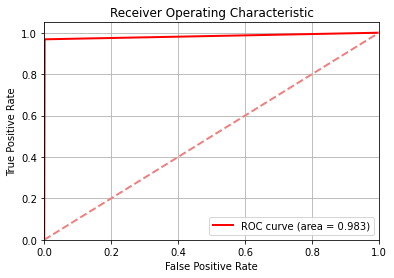

In [39]:
xg_boost_opt.fit(X_train.values,y_train.values)

ml.evaluate_model_metrics(xg_boost_opt,X_train,y_train,X_test,y_test)

## Cross Validation

In [42]:
# Cross-validation

ml.k_cross_validate(xg_boost,X.values,y,cv=10,scoring='accuracy')


accuracy scores: [0.93595506 0.92359551 0.94157303 0.93475816 0.92463442 0.94150731
 0.94713161 0.94263217 0.92913386 0.93138358]

Mean accuracy score:  0.9352304697867823

Standard deviation:  0.00759218778844814


In [44]:
ml.stratified_k_cross_validate(xg_boost,X.values,y,n_splits=10,random_state=42)


Average Accuracy: 0.9350066354065293

Average Precision: 0.8322660005307656

Average Recall: 0.6361219759524844

Average F1-Score: 0.7187764515404088


In [48]:
ml.k_cross_validate(xg_boost_opt,X.values,y,cv=10,scoring='accuracy')


accuracy scores: [0.92808989 0.92022472 0.93146067 0.93138358 0.92463442 0.9336333
 0.93700787 0.93588301 0.92575928 0.93025872]

Mean accuracy score:  0.9298335460876379

Standard deviation:  0.004967257901927086


In [50]:
ml.stratified_k_cross_validate(xg_boost_opt,X.values,y,n_splits=10,random_state=42)


Average Accuracy: 0.9299461584155914

Average Precision: 0.7909480063841335

Average Recall: 0.6386933217441693

Average F1-Score: 0.7052993103695218


In [51]:
final_xg_boost_estimator = xg_boost

In [52]:
# Saving the model

estimator_name = 'XGBoost_Classifier'

ml.save_model(final_xg_boost_estimator, f"../Models/Diabetes/{estimator_name}.pkl")

Saved Model
